In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [15]:
# Load IMDB dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

In [19]:
# Pad sequences so all reviews are the same length
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=256)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=256)

In [21]:
model = keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=32, input_length=(256,)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

In [24]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.6095 - loss: 0.6295 - val_accuracy: 0.8338 - val_loss: 0.3669
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.9255 - loss: 0.2026 - val_accuracy: 0.8654 - val_loss: 0.3159
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.9892 - loss: 0.0539 - val_accuracy: 0.8612 - val_loss: 0.3675
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.9989 - loss: 0.0142 - val_accuracy: 0.8592 - val_loss: 0.4203
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9998 - loss: 0.0043 - val_accuracy: 0.8580 - val_loss: 0.4566


In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8513 - loss: 0.4680
Test Accuracy: 0.85


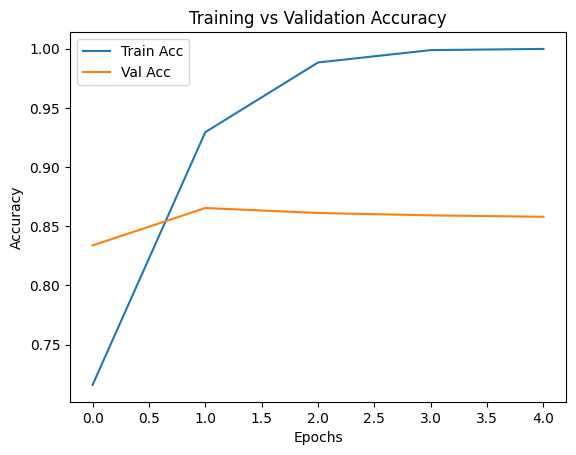

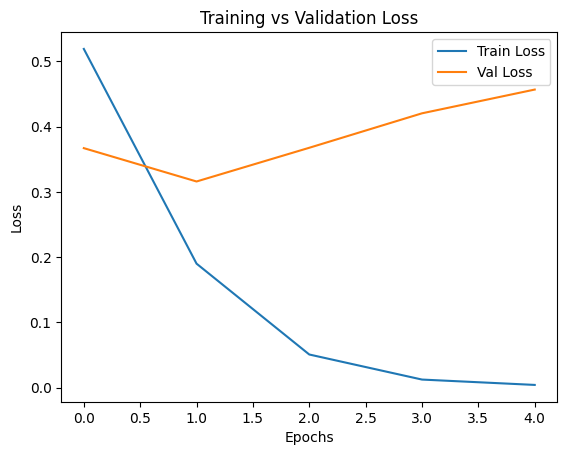

In [32]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


# Loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step


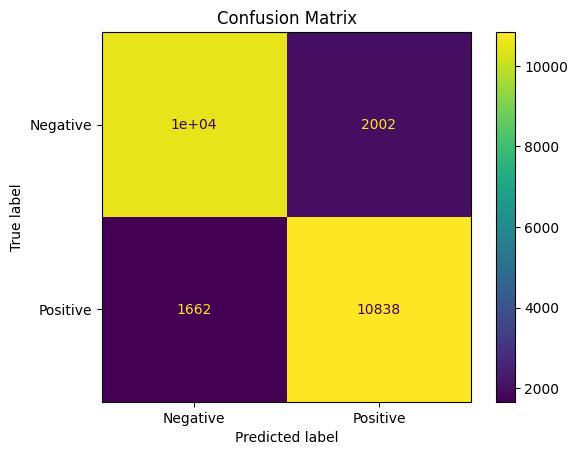

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict probabilities and convert to binary labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
ConfusionMatrixDisplay(cm, display_labels=["Negative", "Positive"]).plot()
plt.title("Confusion Matrix")
plt.show()